In [1]:
import sys
sys.path.insert(0,'../../../')
import flexpart_management.notebooks.sulfate_simple_cluster_corr_paper. \
    sulfate_simple_cluster_corr_paper_lfc as lfc
from flexpart_management.notebooks.sulfate_simple_cluster_corr_paper. \
    sulfate_simple_cluster_corr_paper_lfc import *

reload


2021-01-26 22:23:24,208 useful_scit  WARNING  rpy2 not installed. Everything works except functions requiring r


2021-01-26 22:23:24,208 useful_scit  WARNING  rpy2 not installed. Everything works except functions requiring r


In [2]:
sul = 'Sulfate'
lab_name = 'lab_name'

In [3]:
acsm = lfc.get_acsm_data()

/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diego/miniconda3/envs/b36/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

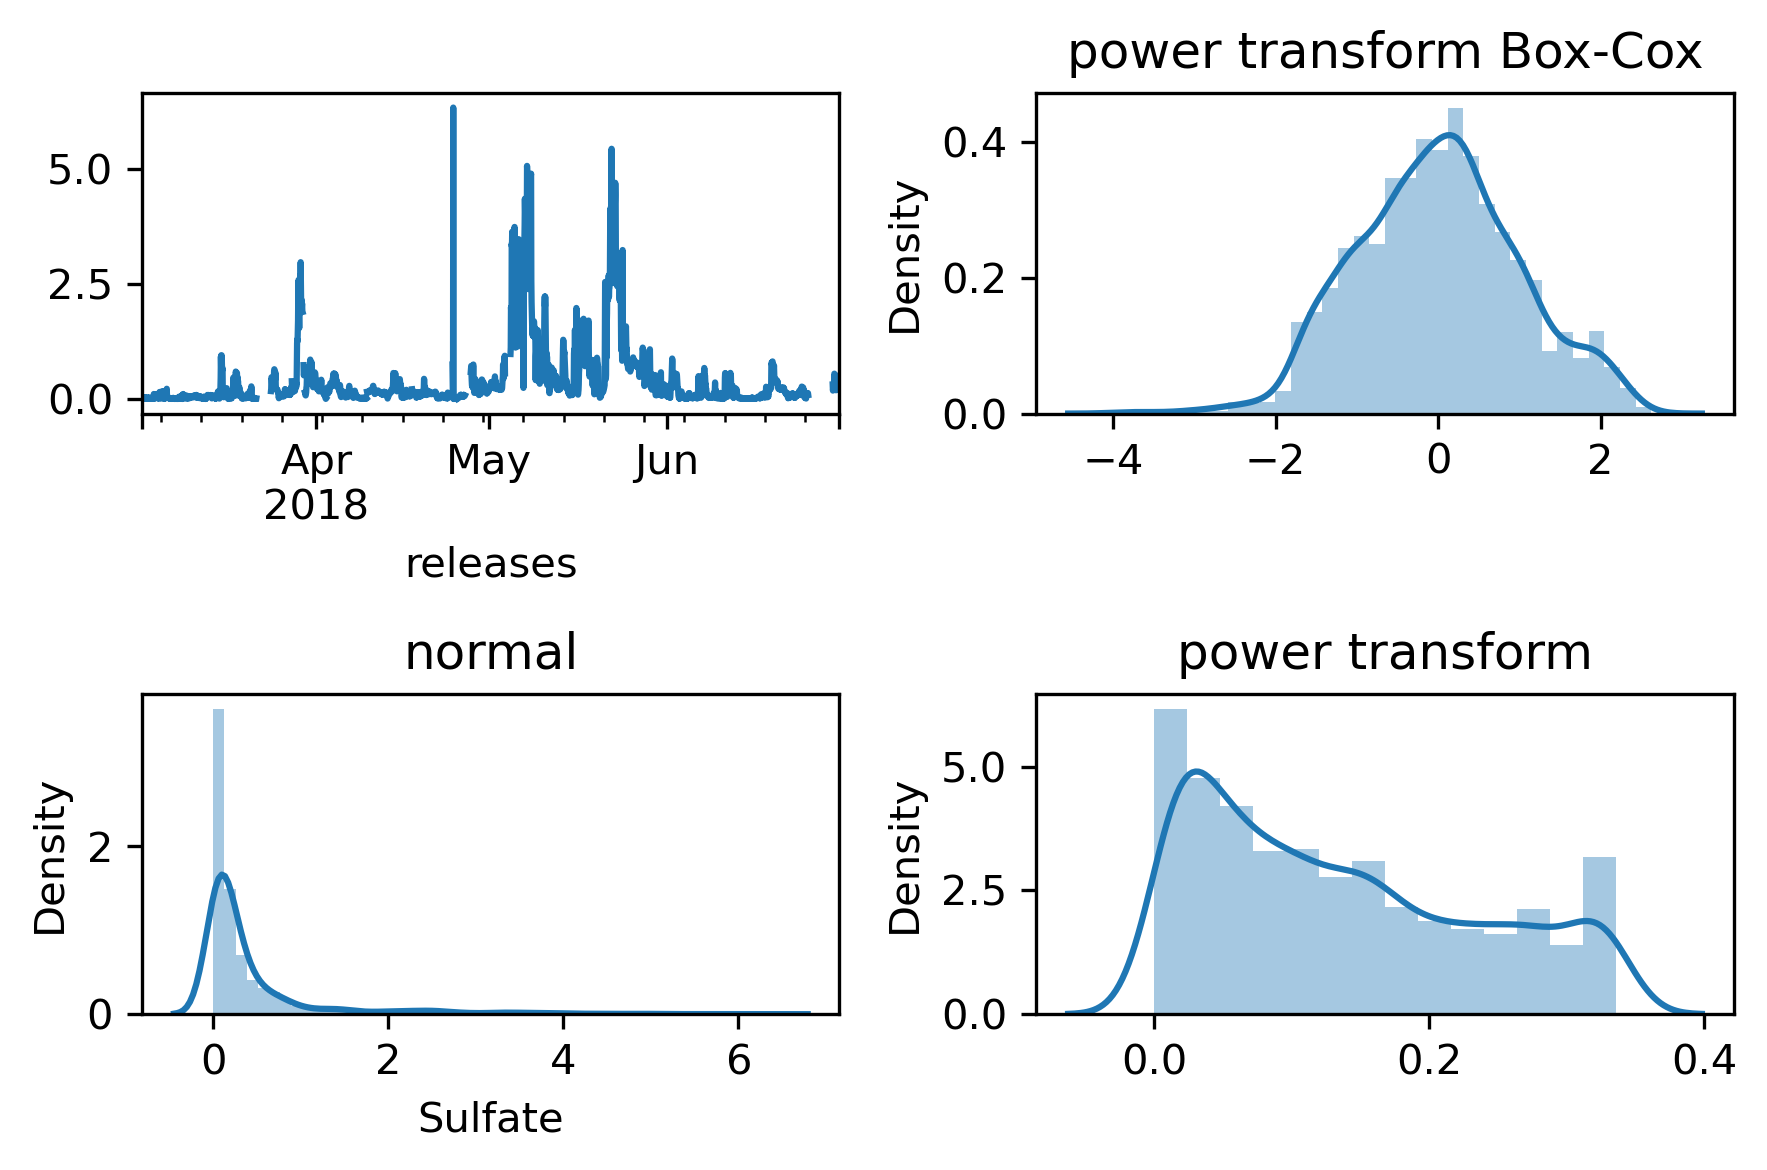

In [4]:
lfc.plot_distributions(acsm, sul)

In [5]:
ds = xr.open_dataset(
'../../releases/v03/data/cluster_series_v3.nc')

In [6]:
ar  = ds['conc_lab_nc06'].loc[
    {'z_column':'ALL','normalized':0}]

In [8]:
ar1 = ar.reset_coords(drop=True).to_dataframe().unstack(0)['conc_lab_nc06']

<AxesSubplot:xlabel='releases'>

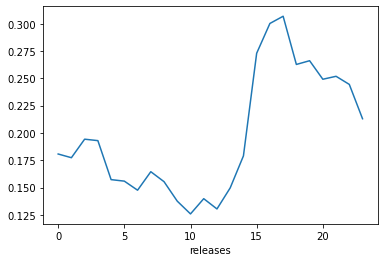

In [9]:
acsm['Organics'].groupby(acsm.index.hour).median().plot()

<AxesSubplot:xlabel='releases'>

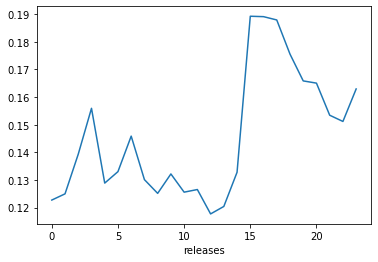

In [10]:
acsm['Sulfate'].groupby(acsm.index.hour).median().plot()

<AxesSubplot:xlabel='releases'>

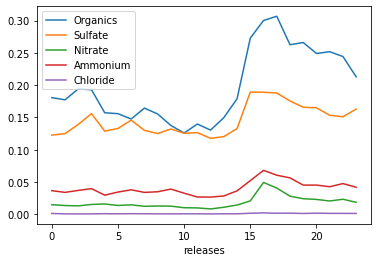

In [11]:
acsm.groupby(acsm.index.hour).median().plot()

In [12]:
labs = ar1.columns

In [13]:
acsm[ar1.columns.values] = ar1[ar1.columns.values]

In [14]:
ac1 = acsm.dropna(how='any')

In [15]:
import sklearn.preprocessing as sp

In [16]:
ac2 = ac1.copy()

In [17]:
ac2[ac1.columns] = sp.StandardScaler().fit_transform(ac1)

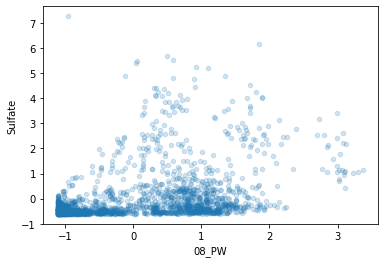

In [18]:
ac2.plot.scatter(x='08_PW',y='Sulfate',alpha=.2)
ax = plt.gca()
# ax.set_xlim(.1,1000000)
# ax.set_ylim(.1,10)
# ax.set_xscale('log')
# ax.set_yscale('log')

In [19]:
import scipy.stats

In [20]:
res = [scipy.stats.pearsonr(ac2[l],ac2['Sulfate']) for l in labs]

In [21]:
res1 = pd.DataFrame(res,index=labs,columns=['r','p'])

<AxesSubplot:xlabel='lab_nc06'>

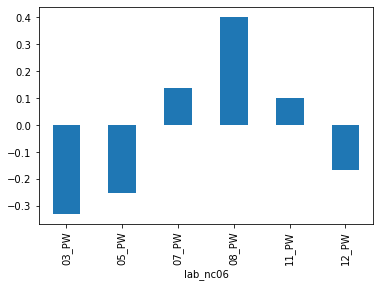

In [22]:
res1['r'].plot.bar()

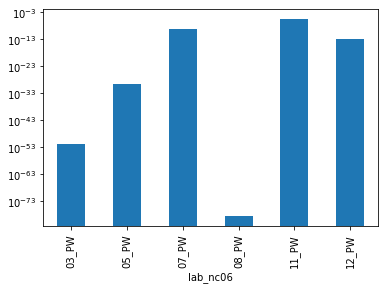

In [25]:
res1['p'].plot.bar()
plt.gca().set_yscale('log')

In [24]:
res1

,r,p
lab_nc06,,
03_PW,-0.330786,8.877541e-53
05_PW,-0.250058,3.577750e-30
07_PW,0.137686,5.165835e-10
08_PW,0.402312,1.874072e-79
11_PW,0.102303,4.081380e-06
12_PW,-0.164490,1.014150e-13
